In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import matplotlib as mpl
from aging.plotting import format_plots, PlotConfig, save_factory, figure, legend, format_pizza_plots, COLORMAPS
from collections import Counter
from matplotlib.lines import Line2D
from aging.organization.dataframes import load_male_long_df, load_female_long_df, DF_PATHS
from tqdm import tqdm

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import colorcet as cc
from operator import add
from tqdm.auto import tqdm
from functools import reduce
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.spatial.distance import squareform, pdist
from sklearn.metrics import silhouette_score
from aging.plotting import format_plots, figure, save_factory, PlotConfig, legend, add_identity

In [3]:
def mm_norm_col(column):
    return (column - column.min()) / (column.max() - column.min())

In [4]:
cmm = COLORMAPS.ont_male
cmf = COLORMAPS.ont_female
m_df = load_male_long_df(average_weeks=True, merge_size=False, merge_ages=True, df_path=DF_PATHS.usage_male).groupby(['age','mouse']).mean()
f_df = load_female_long_df(average_weeks=True, merge_size=False, filter_female=True, merge_ages=True, df_path=DF_PATHS.usage_female).groupby(['age','mouse']).mean()

## heatmaps

In [5]:
# avarage per age or session
avg_m_df = m_df.groupby(['age']).mean()
avg_f_df = f_df.groupby(['age']).mean()

# normalize the data
m_norm = mm_norm_col(m_df)
avg_m_norm = mm_norm_col(avg_m_df)

# normalize the data
f_norm = mm_norm_col(f_df)
avg_f_norm = mm_norm_col(avg_f_df)


In [6]:
format_plots()

In [7]:
## male heatmap average

In [8]:
# get distance
data=avg_m_norm # un-normalized
dist_matrix = squareform(pdist(data,metric='cosine'))
data_labels=data.index.get_level_values('age').to_numpy()

percentiles_up = [95]
percentiles_down = [5]
vmax_value = np.percentile(dist_matrix, percentiles_up)
vmin_value = np.percentile(dist_matrix, percentiles_down)

In [9]:
print(vmax_value)
print(vmin_value)

[0.57430365]
[0.02377485]


In [10]:
#colors for plotting
cmap2 = cmm
ages = np.unique(data_labels)
colors = np.int_(np.arange(0, 256, 256/len(ages)))
seqmatcolor='magma_r'

# create age labels colors
lines=[]
counter = Counter(data_labels)
sorted(counter.items())
a=np.array([*counter.values()])

color_mat=[]
n=0
for i,c in enumerate(colors):
    for j in range(a[i]):
        color_mat.append(cmap2(c))

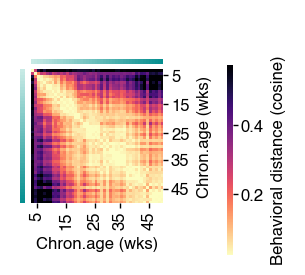

In [11]:
# plot syllable usage acoss time points
cg=sns.clustermap(
    data=dist_matrix,
    cmap=seqmatcolor, 
    figsize=(1.3, 1.3),
    col_colors=color_mat,
    row_colors=color_mat,
    cbar_pos=(1.02, 0.025, 0.025, .73),
    col_cluster=False,
    row_cluster=False,
    yticklabels=ages,
    xticklabels=ages,
    cbar_kws={'label': 'Behavioral distance (cosine)'}, 
    vmin=vmin_value,
    vmax=vmax_value,
    rasterized=True,
    )
cg.ax_row_dendrogram.set_visible(False)
ax = cg.ax_heatmap
#ax.tick_params(left=False, bottom=False, right=False)
ax.set_xlabel('Chron.age (wks)')
ax.set_ylabel('Chron.age (wks)')

# Desired tick labels
desired_ages = [5, 15, 25, 35, 45]
# Find the positions of the desired ages
tick_positions = [np.where(data_labels == age)[0][0] for age in desired_ages]
tick_labels = desired_ages

# Set x and y ticks and labels
ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_labels)
ax.set_yticks(tick_positions)
ax.set_yticklabels(tick_labels)
# legend
#for i,c in enumerate(colors):
#        lines.append(Line2D([0], [0], color=cmap2(c), lw=2))
#plt.legend(handles=lines,labels=list(ages),bbox_to_anchor=(10, 1),loc='upper right',fontsize=6)
plt.show()

In [12]:
c = PlotConfig()
cg.savefig(c.dana_save_path / "fig4"/ '07_31_male_dist_matrix_minmax_cosine_longv2.pdf')

In [13]:
## female

In [14]:
# get distance
data=avg_f_norm # un-normalized
dist_matrix = squareform(pdist(data,metric='cosine'))
data_labels=data.index.get_level_values('age').to_numpy()

percentiles_up = [95]
percentiles_down = [5]
#vmax_value = np.percentile(dist_matrix, percentiles_up)
#vmin_value = np.percentile(dist_matrix, percentiles_down)

In [15]:
#colors for plotting
cmap2 = cmf
ages = np.unique(data_labels)
colors = np.int_(np.arange(0, 256, 256/len(ages)))
seqmatcolor='magma_r'

# create age labels colors
lines=[]
counter = Counter(data_labels)
sorted(counter.items())
a=np.array([*counter.values()])

color_mat=[]
n=0
for i,c in enumerate(colors):
    for j in range(a[i]):
        color_mat.append(cmap2(c))

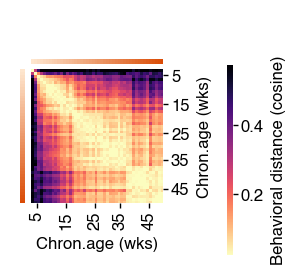

In [16]:
# plot syllable usage acoss time points
cg=sns.clustermap(
    data=dist_matrix,
    #data=squareform(pdist(data,metric='cosine')),
    cmap=seqmatcolor, 
    figsize=(1.3, 1.3),
    col_colors=color_mat,
    row_colors=color_mat,
    cbar_pos=(1.02, 0.025, 0.025, .73),
    col_cluster=False,
    row_cluster=False,
    yticklabels=ages,
    xticklabels=ages,
    cbar_kws={'label': 'Behavioral distance (cosine)'}, 
    vmin=vmin_value,
    vmax=vmax_value,
    rasterized=True,
    )
cg.ax_row_dendrogram.set_visible(False)
ax = cg.ax_heatmap
#ax.tick_params(left=False, bottom=False, right=False)
ax.set_xlabel('Chron.age (wks)')
ax.set_ylabel('Chron.age (wks)')

# Desired tick labels
desired_ages = [5, 15, 25, 35, 45]
# Find the positions of the desired ages
tick_positions = [np.where(data_labels == age)[0][0] for age in desired_ages]
tick_labels = desired_ages

# Set x and y ticks and labels
ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_labels)
ax.set_yticks(tick_positions)
ax.set_yticklabels(tick_labels)

# legend
#for i,c in enumerate(colors):
#        lines.append(Line2D([0], [0], color=cmap2(c), lw=2))
#plt.legend(handles=lines,labels=list(ages),bbox_to_anchor=(10, 1),loc='upper right',fontsize=6)
plt.show()

In [17]:
c = PlotConfig()
cg.savefig(c.dana_save_path / "fig3"/ '07_31_female_dist_matrix_minmax_cosine_longv2.pdf')